In [71]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [124]:
df = pd.read_excel("Data/New_Demos.xlsx")
df_D = df[['Station', "White", "Latino", "Black", "Asian"]]
df_G = df[['Station', "Male", "Female"]]

## Get percentages from counts
df_D = df_D.set_index("Station")
df_D = df_D.div(df_D.sum(axis=1), axis=0).multiply(100).round(decimals=1)


df_D.loc['US Population'] = [60.0, 18.4,  12.4, 5.6]
df_D['Other'] = 0.0
df_D.at['US Population', "Other"] = 3.6


df_G = df_G.set_index("Station")
df_G = df_G.div(df_G.sum(axis=1), axis=0).multiply(100).round(decimals=1)
df_G.loc['US Population'] = [49.2, 50.8]


def mse(dataframe, size):
    baseline = list(dataframe.iloc[5])
    sums = []
    for item in range(5):
        comparison = list(dataframe.iloc[item])
        
        ## Calculate MSE 
        amount = [(abs(j-i)**2)/size for i,j in zip(baseline, comparison)]
        sums.append(sum(amount))
        
    sums = ['%.1f' % elem for elem in sums]
    sums = [float(elem) for elem in sums]
    sums.append(0)
    return(sums)

df_D['MSE'] = mse(df_D, 5)
df_G['MSE'] = mse(df_G, 2)
df_D = df_D.sort_values(by="MSE")
df_G = df_G.sort_values(by="MSE")
df_D

,White,Latino,Black,Asian,Other,MSE
Station,,,,,,
US Population,60.0,18.4,12.4,5.6,3.6,0.0
ABC,66.1,14.3,17.9,1.8,0.0,22.3
CBS,69.9,7.5,16.1,6.5,0.0,48.9
CNN,74.6,5.6,11.3,8.5,0.0,79.9
NBC,75.0,2.5,17.5,5.0,0.0,103.4
Fox,89.4,2.1,6.4,2.1,0.0,238.3


In [121]:
df_G

,Male,Female,MSE
Station,,,
CNN,49.3,50.7,0.0
US Population,49.2,50.8,0.0
CBS,51.6,48.4,5.8
NBC,52.5,47.5,10.9
Fox,57.4,42.6,67.2
ABC,62.5,37.5,176.9


In [122]:
df

,Station,White,Black,Asian,Latino,Male,Female
0,Fox,42,3,1,1,27,20
1,CNN,53,8,6,4,35,36
2,ABC,37,10,1,8,35,21
3,CBS,65,15,6,7,48,45
4,NBC,30,7,2,1,21,19


#### US Demographics

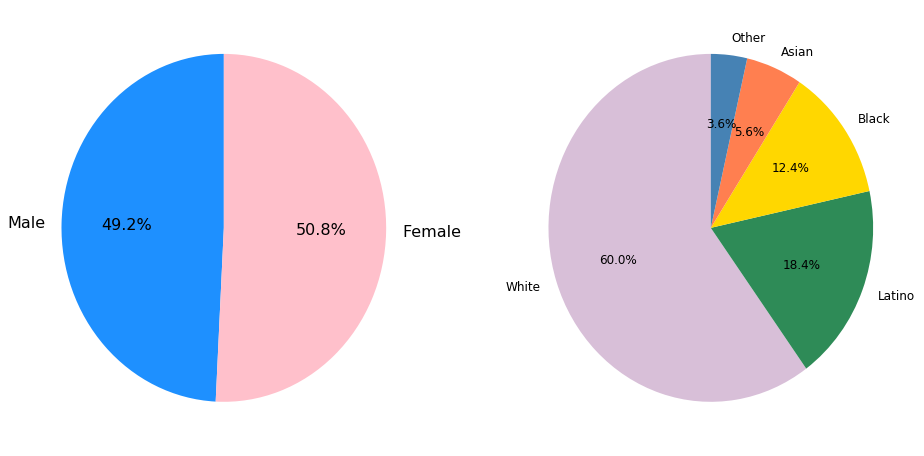

In [125]:
df_G = df_G[['Male', "Female"]]
df_D = df_D[["White", "Latino", "Black", "Asian", "Other"]]

q = df_G.transpose()
w = df_D.transpose()


fig = plt.figure(figsize=(16,8))
ax1 = plt.subplot(1,2,1) 
ax2 = plt.subplot(1,2,2)

z = q['US Population'].plot(kind='pie', ax=ax1, autopct='%1.1f%%', startangle=90, fontsize=16, colors=['dodgerblue', 'pink'])
t = w['US Population'].plot(kind='pie', ax=ax2, autopct='%1.1f%%', startangle=90, fontsize=12, colors=['thistle', 'seagreen', 'gold', 'coral', "steelblue"])
plt.ylabel('')
ax1.yaxis.label.set_visible(False)
plt.savefig("Images/US_Pop.png", dpi=400)

In [126]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly import tools
import numpy as np

cmap = plt.get_cmap('Set2')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
gender_pie = go.Pie(labels=q['US Population'].index, values=q['US Population'], marker=dict(colors=colors[1:3]
                                                            , line=dict(color='#FFF', width=2)), 
                                                            domain={'x': [0.0, .4], 'y': [0.0, 1]}
                                                            , showlegend=False, name='Gender', textinfo='label+percent')

demo_pie = go.Pie(labels=w['US Population'].index, values=w['US Population'], marker=dict(colors=colors
                                                            , line=dict(color='#FFF', width=2)), 
                                                            domain={'x': [.6, 1], 'y': [0.0, 1]}
                                                            , showlegend=False, name='Demographics', textinfo='label+percent')

layout = go.Layout(height = 600,
                   width = 1000,
                   autosize = False,
                   title = 'Gender and Racial Demographics of US Population')
fig = go.Figure(data = [gender_pie,demo_pie ], layout = layout)


py.iplot(fig, filename='basic_pie_chart')

In [127]:
## Remove Other Category from Pie Charts (Didn't collect Other Category)

df_G = df_G[['Male', "Female"]]
df_D = df_D[["White", "Latino", "Black", "Asian"]]

q = df_G.transpose()
w = df_D.transpose()

#### Fox News

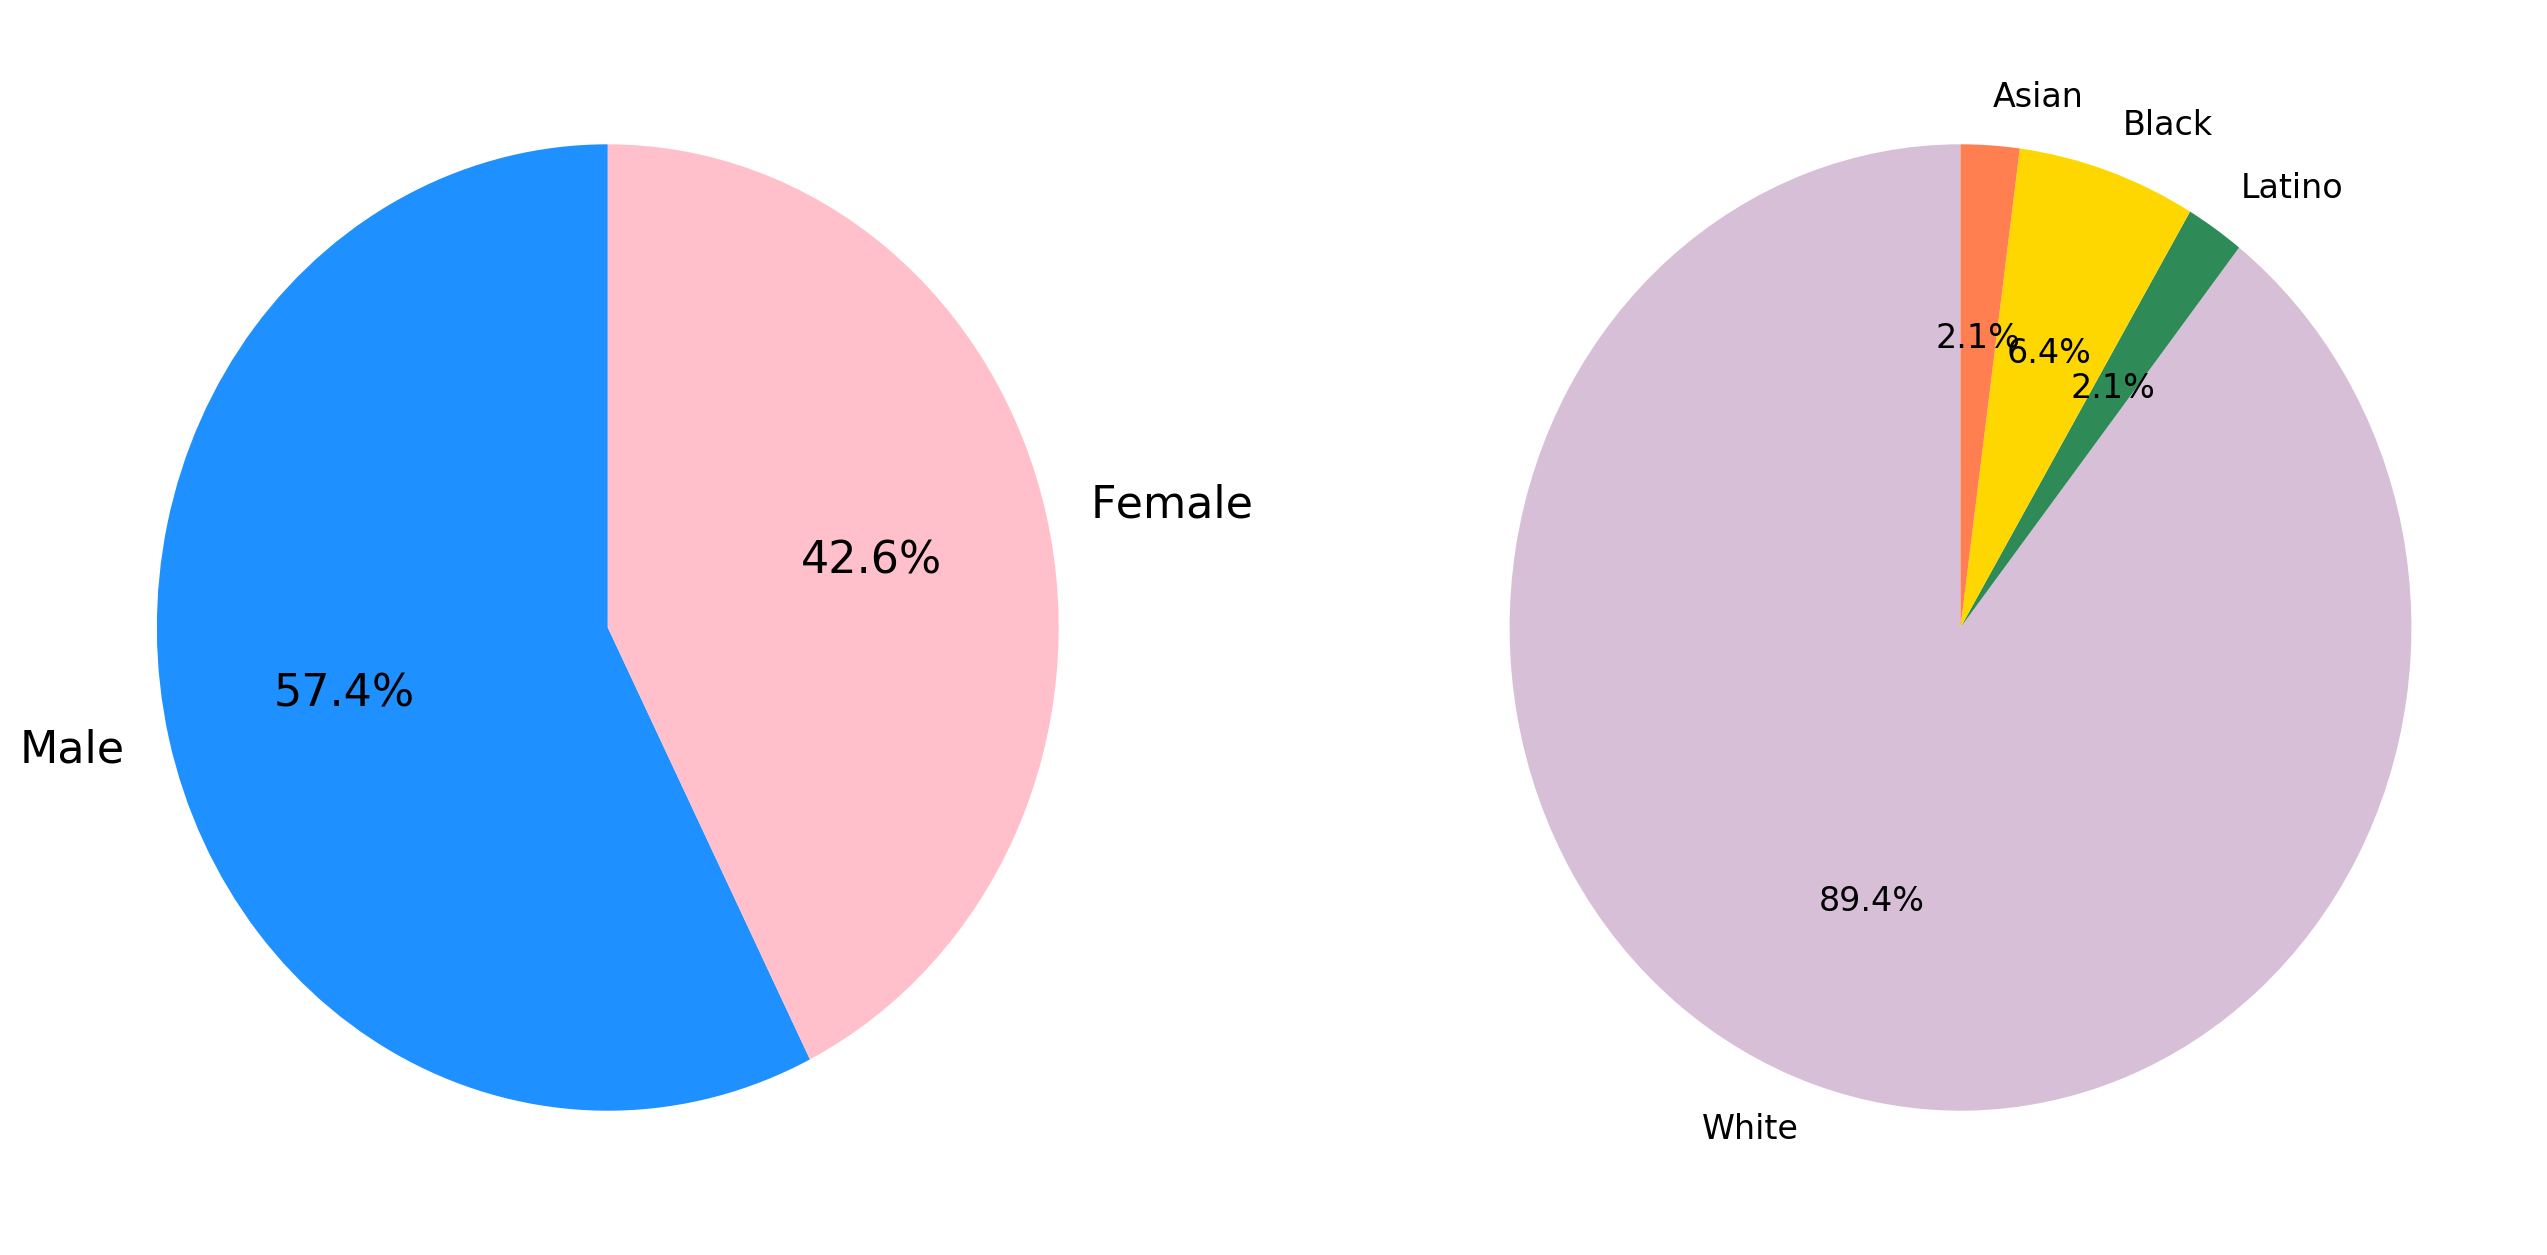

In [131]:
fig = plt.figure(figsize=(16,8), dpi=200)
ax1 = plt.subplot(1,2,1) 
ax2 = plt.subplot(1,2,2)

z = q['Fox'].plot(kind='pie', ax=ax1, autopct='%1.1f%%', startangle=90, fontsize=16, colors=['dodgerblue', 'pink'])
t = w['Fox'].plot(kind='pie', ax=ax2, autopct='%1.1f%%', startangle=90, fontsize=12, colors=['thistle', 'seagreen', 'gold', 'coral'])
plt.ylabel('')
ax1.yaxis.label.set_visible(False)
plt.savefig("Images/Fox.png", dpi=400)

#### CNN

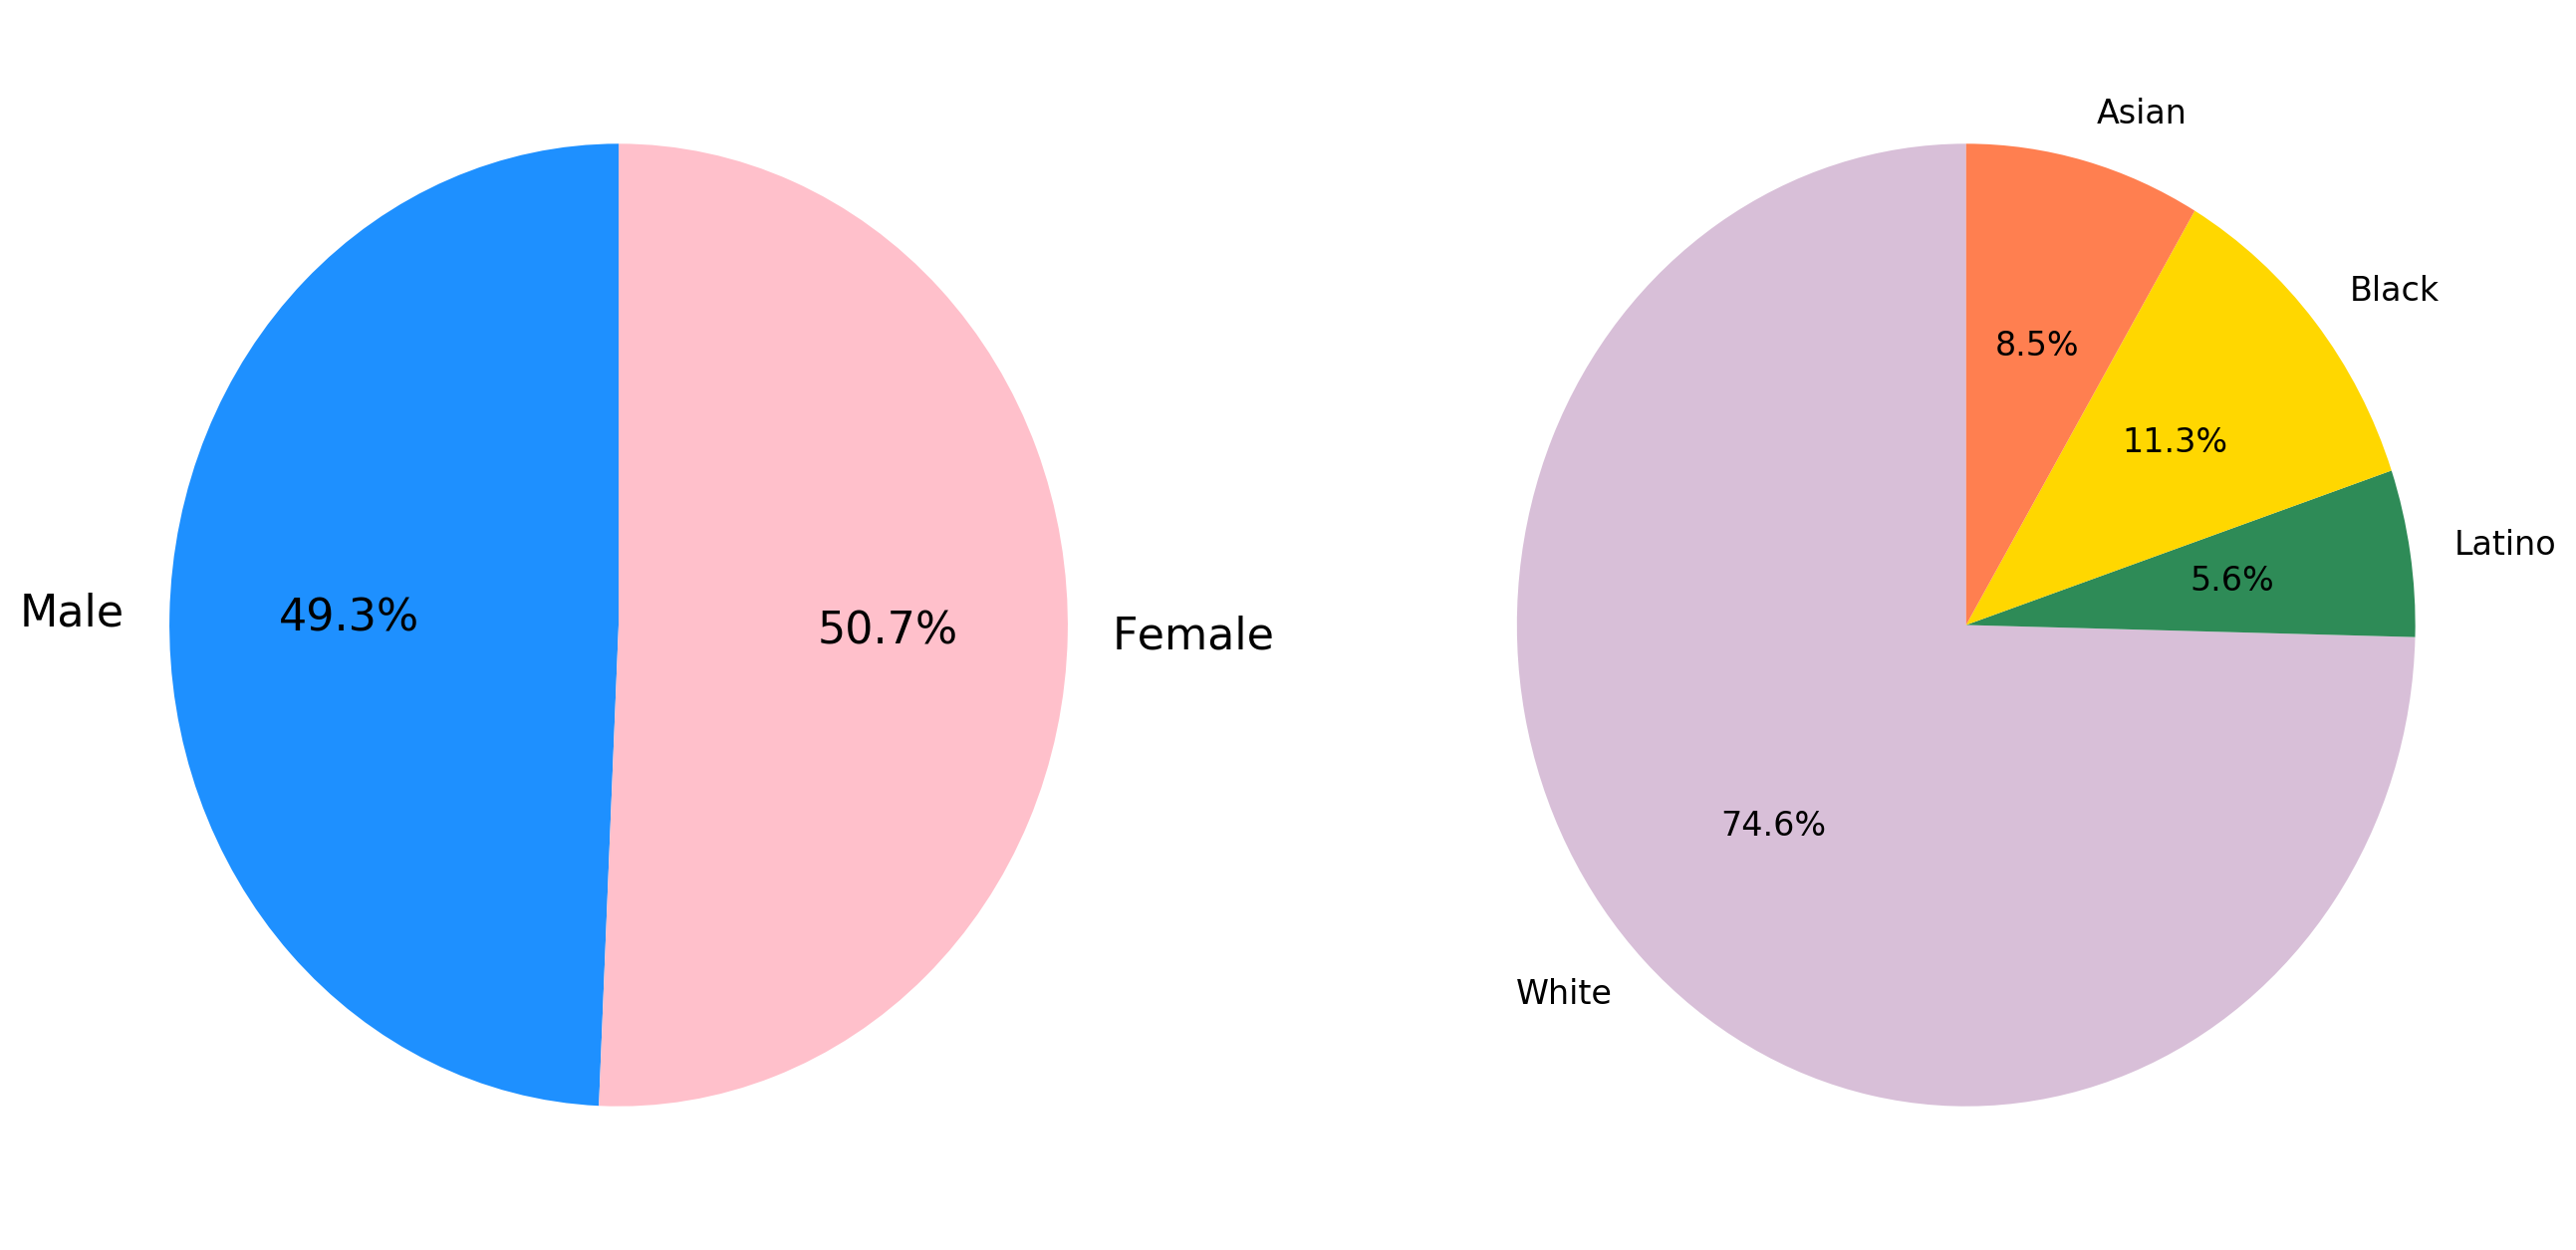

In [116]:
fig = plt.figure(figsize=(16,8), dpi=200)
ax1 = plt.subplot(1,2,1) 
ax2 = plt.subplot(1,2,2)

z = q['CNN'].plot(kind='pie', ax=ax1, autopct='%1.1f%%', startangle=90, fontsize=16, colors=['dodgerblue', 'pink'])
t = w['CNN'].plot(kind='pie', ax=ax2, autopct='%1.1f%%', startangle=90, fontsize=12, colors=['thistle', 'seagreen', 'gold', 'coral'])
plt.ylabel('')
ax1.yaxis.label.set_visible(False)
plt.savefig("Images/CNN.png", dpi=400)

#### ABC

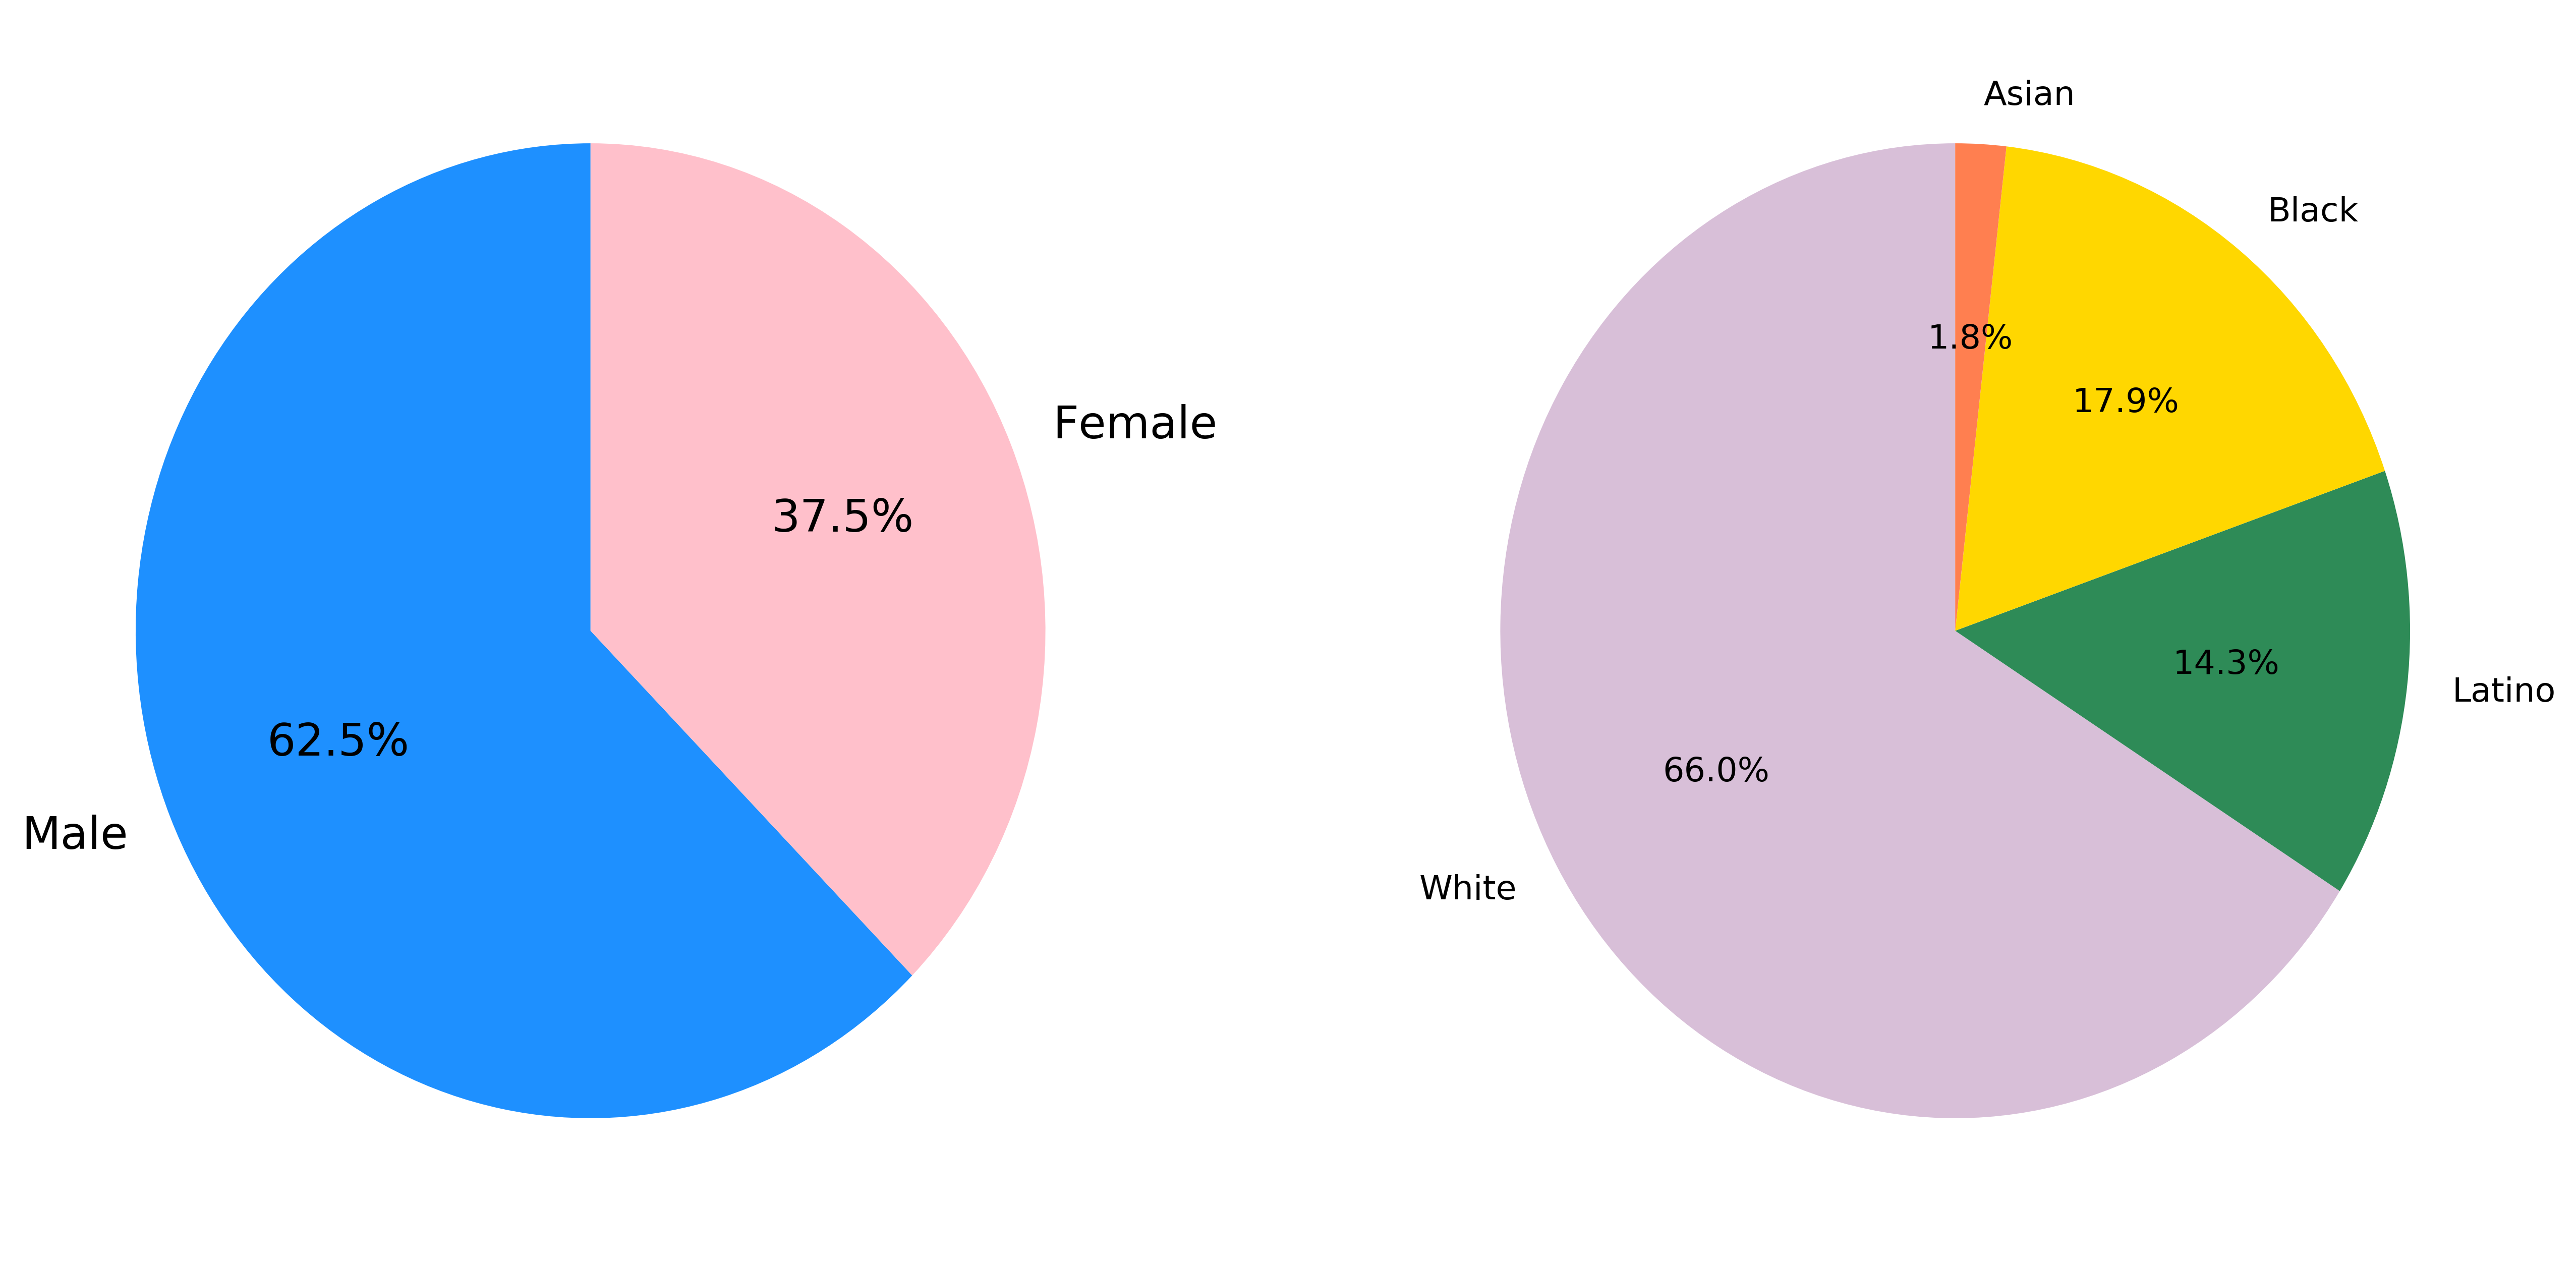

In [117]:
fig = plt.figure(figsize=(16,8), dpi=400)
ax1 = plt.subplot(1,2,1) 
ax2 = plt.subplot(1,2,2)

z = q['ABC'].plot(kind='pie', ax=ax1, autopct='%1.1f%%', startangle=90, fontsize=16, colors=['dodgerblue', 'pink'])
t = w['ABC'].plot(kind='pie', ax=ax2, autopct='%1.1f%%', startangle=90, fontsize=12, colors=['thistle', 'seagreen', 'gold', 'coral'])
plt.ylabel('')
ax1.yaxis.label.set_visible(False)
plt.savefig("Images/ABC.png", dpi=400)

#### CBS

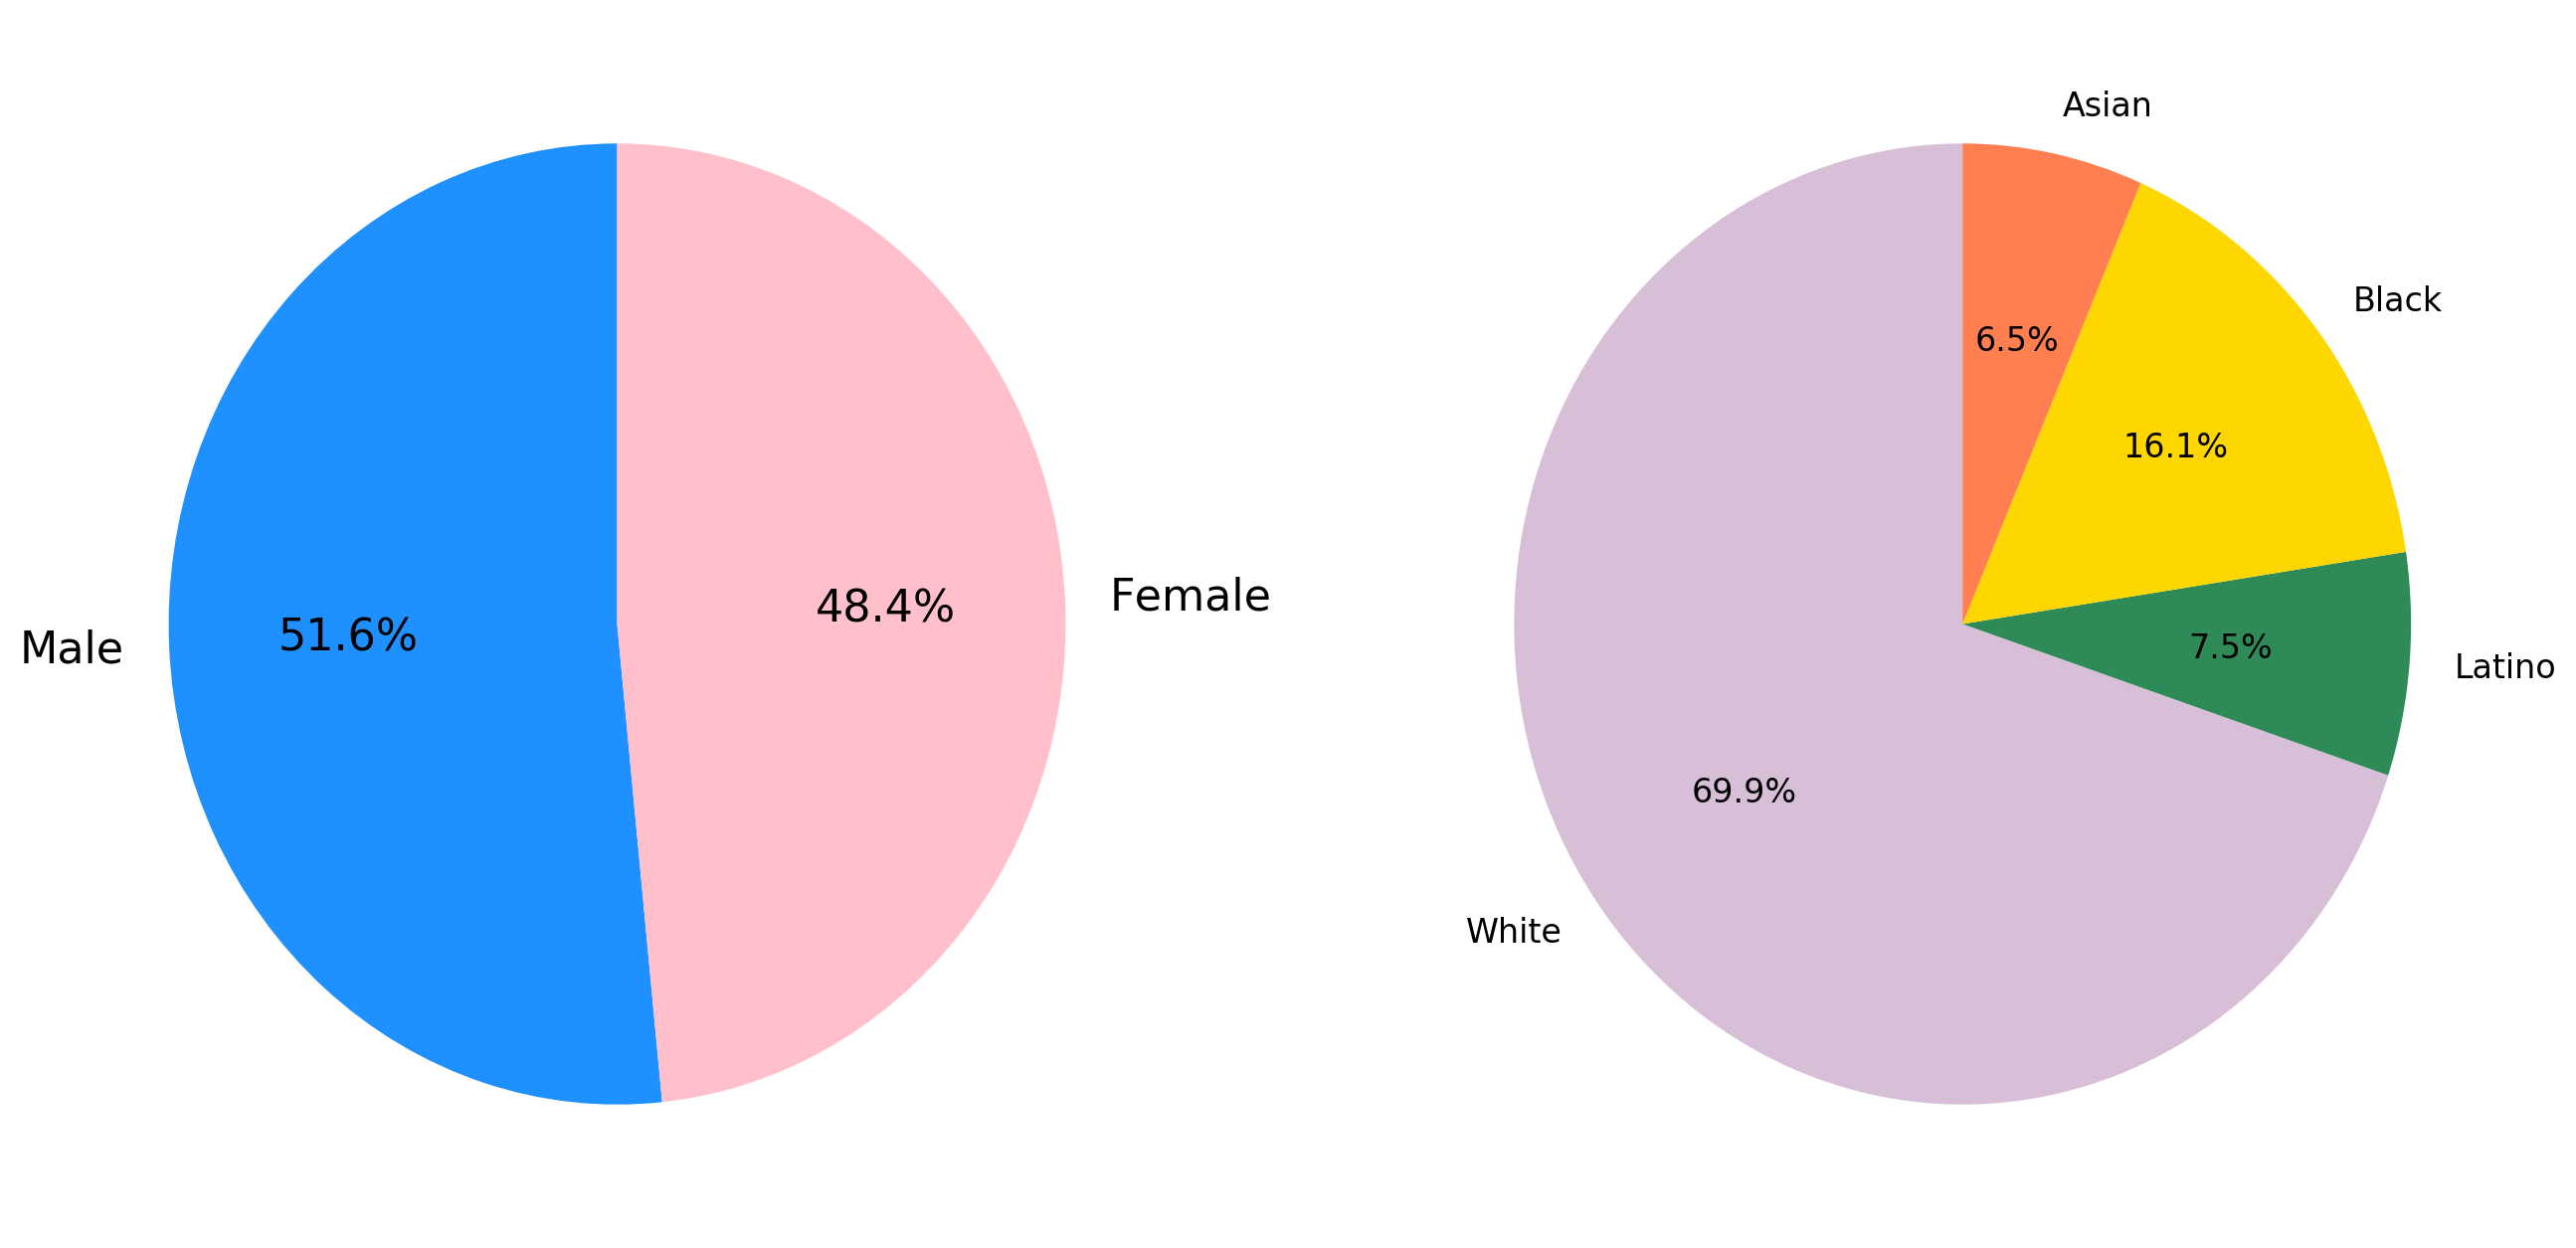

In [118]:
fig = plt.figure(figsize=(16,8), dpi=200)
ax1 = plt.subplot(1,2,1) 
ax2 = plt.subplot(1,2,2)

z = q['CBS'].plot(kind='pie', ax=ax1, autopct='%1.1f%%', startangle=90, fontsize=16, colors=['dodgerblue', 'pink'])
t = w['CBS'].plot(kind='pie', ax=ax2, autopct='%1.1f%%', startangle=90, fontsize=12, colors=['thistle', 'seagreen', 'gold', 'coral'])
plt.ylabel('')
ax1.yaxis.label.set_visible(False)
plt.savefig("Images/CBS.png", dpi=400)

#### NBC

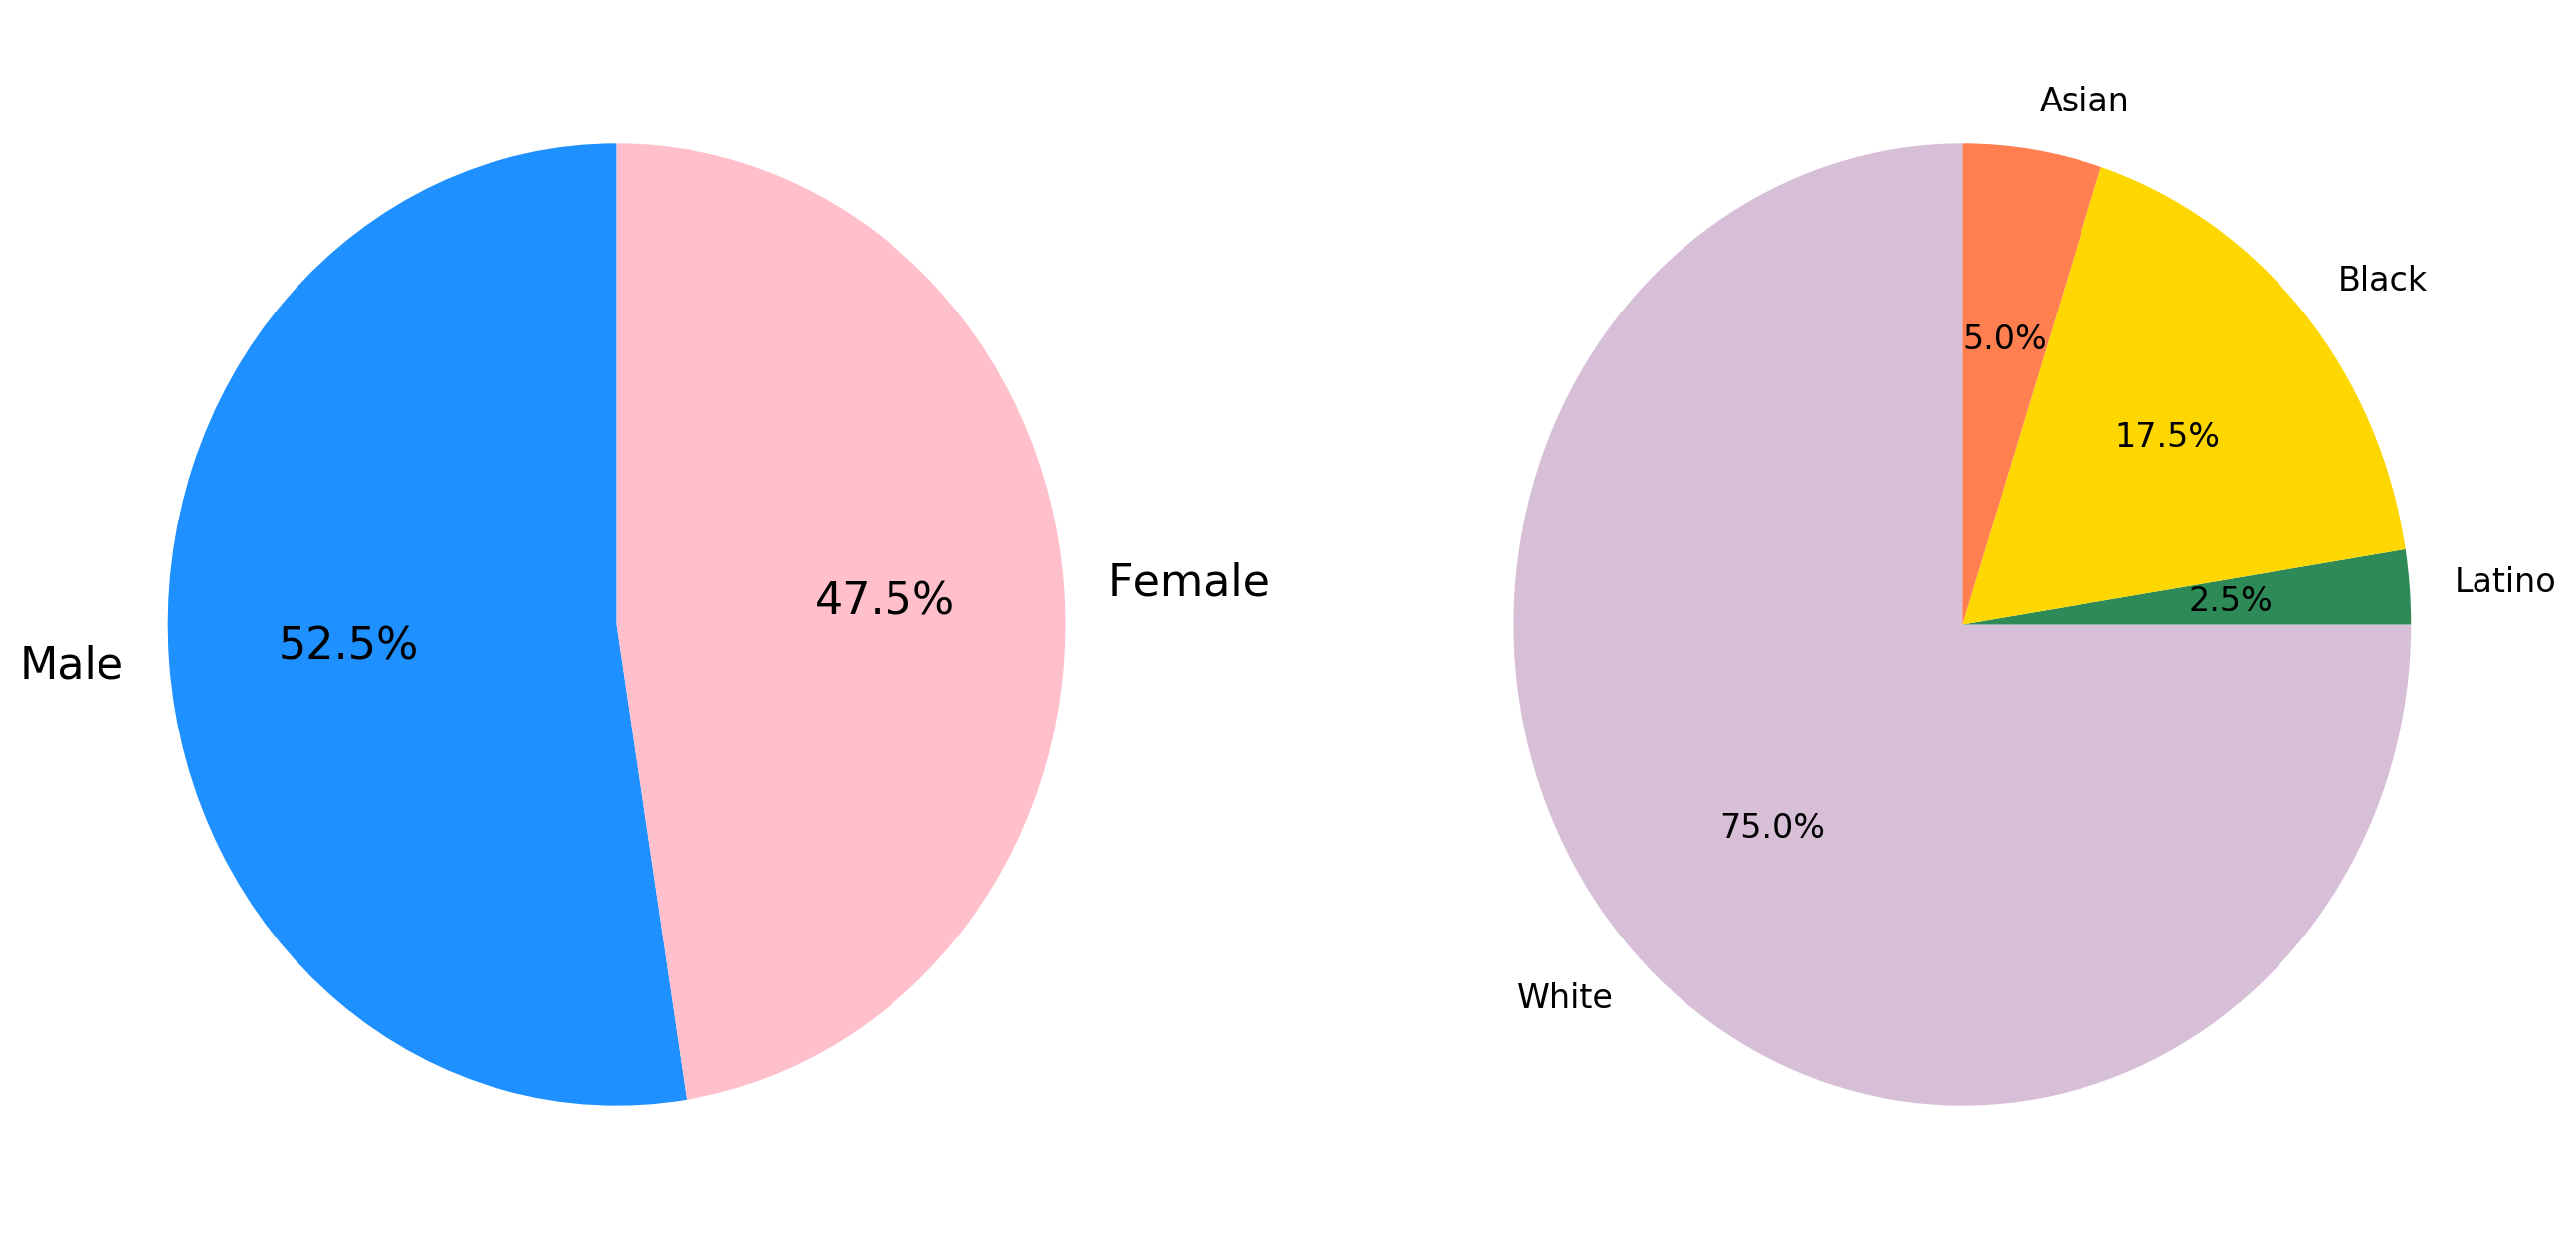

In [119]:
fig = plt.figure(figsize=(16,8), dpi=200)
ax1 = plt.subplot(1,2,1) 
ax2 = plt.subplot(1,2,2)

z = q['NBC'].plot(kind='pie', ax=ax1, autopct='%1.1f%%', startangle=90, fontsize=16, colors=['dodgerblue', 'pink'])
t = w['NBC'].plot(kind='pie', ax=ax2, autopct='%1.1f%%', startangle=90, fontsize=12, colors=['thistle', 'seagreen', 'gold', 'coral'])
plt.ylabel('')
ax1.yaxis.label.set_visible(False)
plt.savefig("Images/NBC.png", dpi=400)

#### End of Script